In [27]:
import numpy as np
import pandas as pd
import sklearn
import urllib.request
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
 
# URLs of the data and names files
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data"
names_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.names"

#Complete code also in github : 

 


To get and print the data

In [6]:

# Download and save the data file
urllib.request.urlretrieve(data_url, "housing.data")

# Download and save the names file
urllib.request.urlretrieve(names_url, "housing.names")

('housing.names', <http.client.HTTPMessage at 0x1af771deed0>)

To open information to the data 

In [11]:
with open("Data/housing.names", "r") as file:
    content = file.read()
print(content)


1. Title: Boston Housing Data

2. Sources:
   (a) Origin:  This dataset was taken from the StatLib library which is
                maintained at Carnegie Mellon University.
   (b) Creator:  Harrison, D. and Rubinfeld, D.L. 'Hedonic prices and the 
                 demand for clean air', J. Environ. Economics & Management,
                 vol.5, 81-102, 1978.
   (c) Date: July 7, 1993

3. Past Usage:
   -   Used in Belsley, Kuh & Welsch, 'Regression diagnostics ...', Wiley, 
       1980.   N.B. Various transformations are used in the table on
       pages 244-261.
    -  Quinlan,R. (1993). Combining Instance-Based and Model-Based Learning.
       In Proceedings on the Tenth International Conference of Machine 
       Learning, 236-243, University of Massachusetts, Amherst. Morgan
       Kaufmann.

4. Relevant Information:

   Concerns housing values in suburbs of Boston.

5. Number of Instances: 506

6. Number of Attributes: 13 continuous attributes (including "class"
                

To obtain data information and change the columns' names 

In [16]:
df = pd.read_csv("Data/housing.data", delim_whitespace=True, header=None)
col_name = ['CRIM', 'ZN' , 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.columns = col_name
df.head()

C:\Users\yourk\AppData\Local\Temp\ipykernel_6604\1101388959.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv("Data/housing.data", delim_whitespace=True, header=None)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


Some extra information about the data given

In [20]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Graph the data information

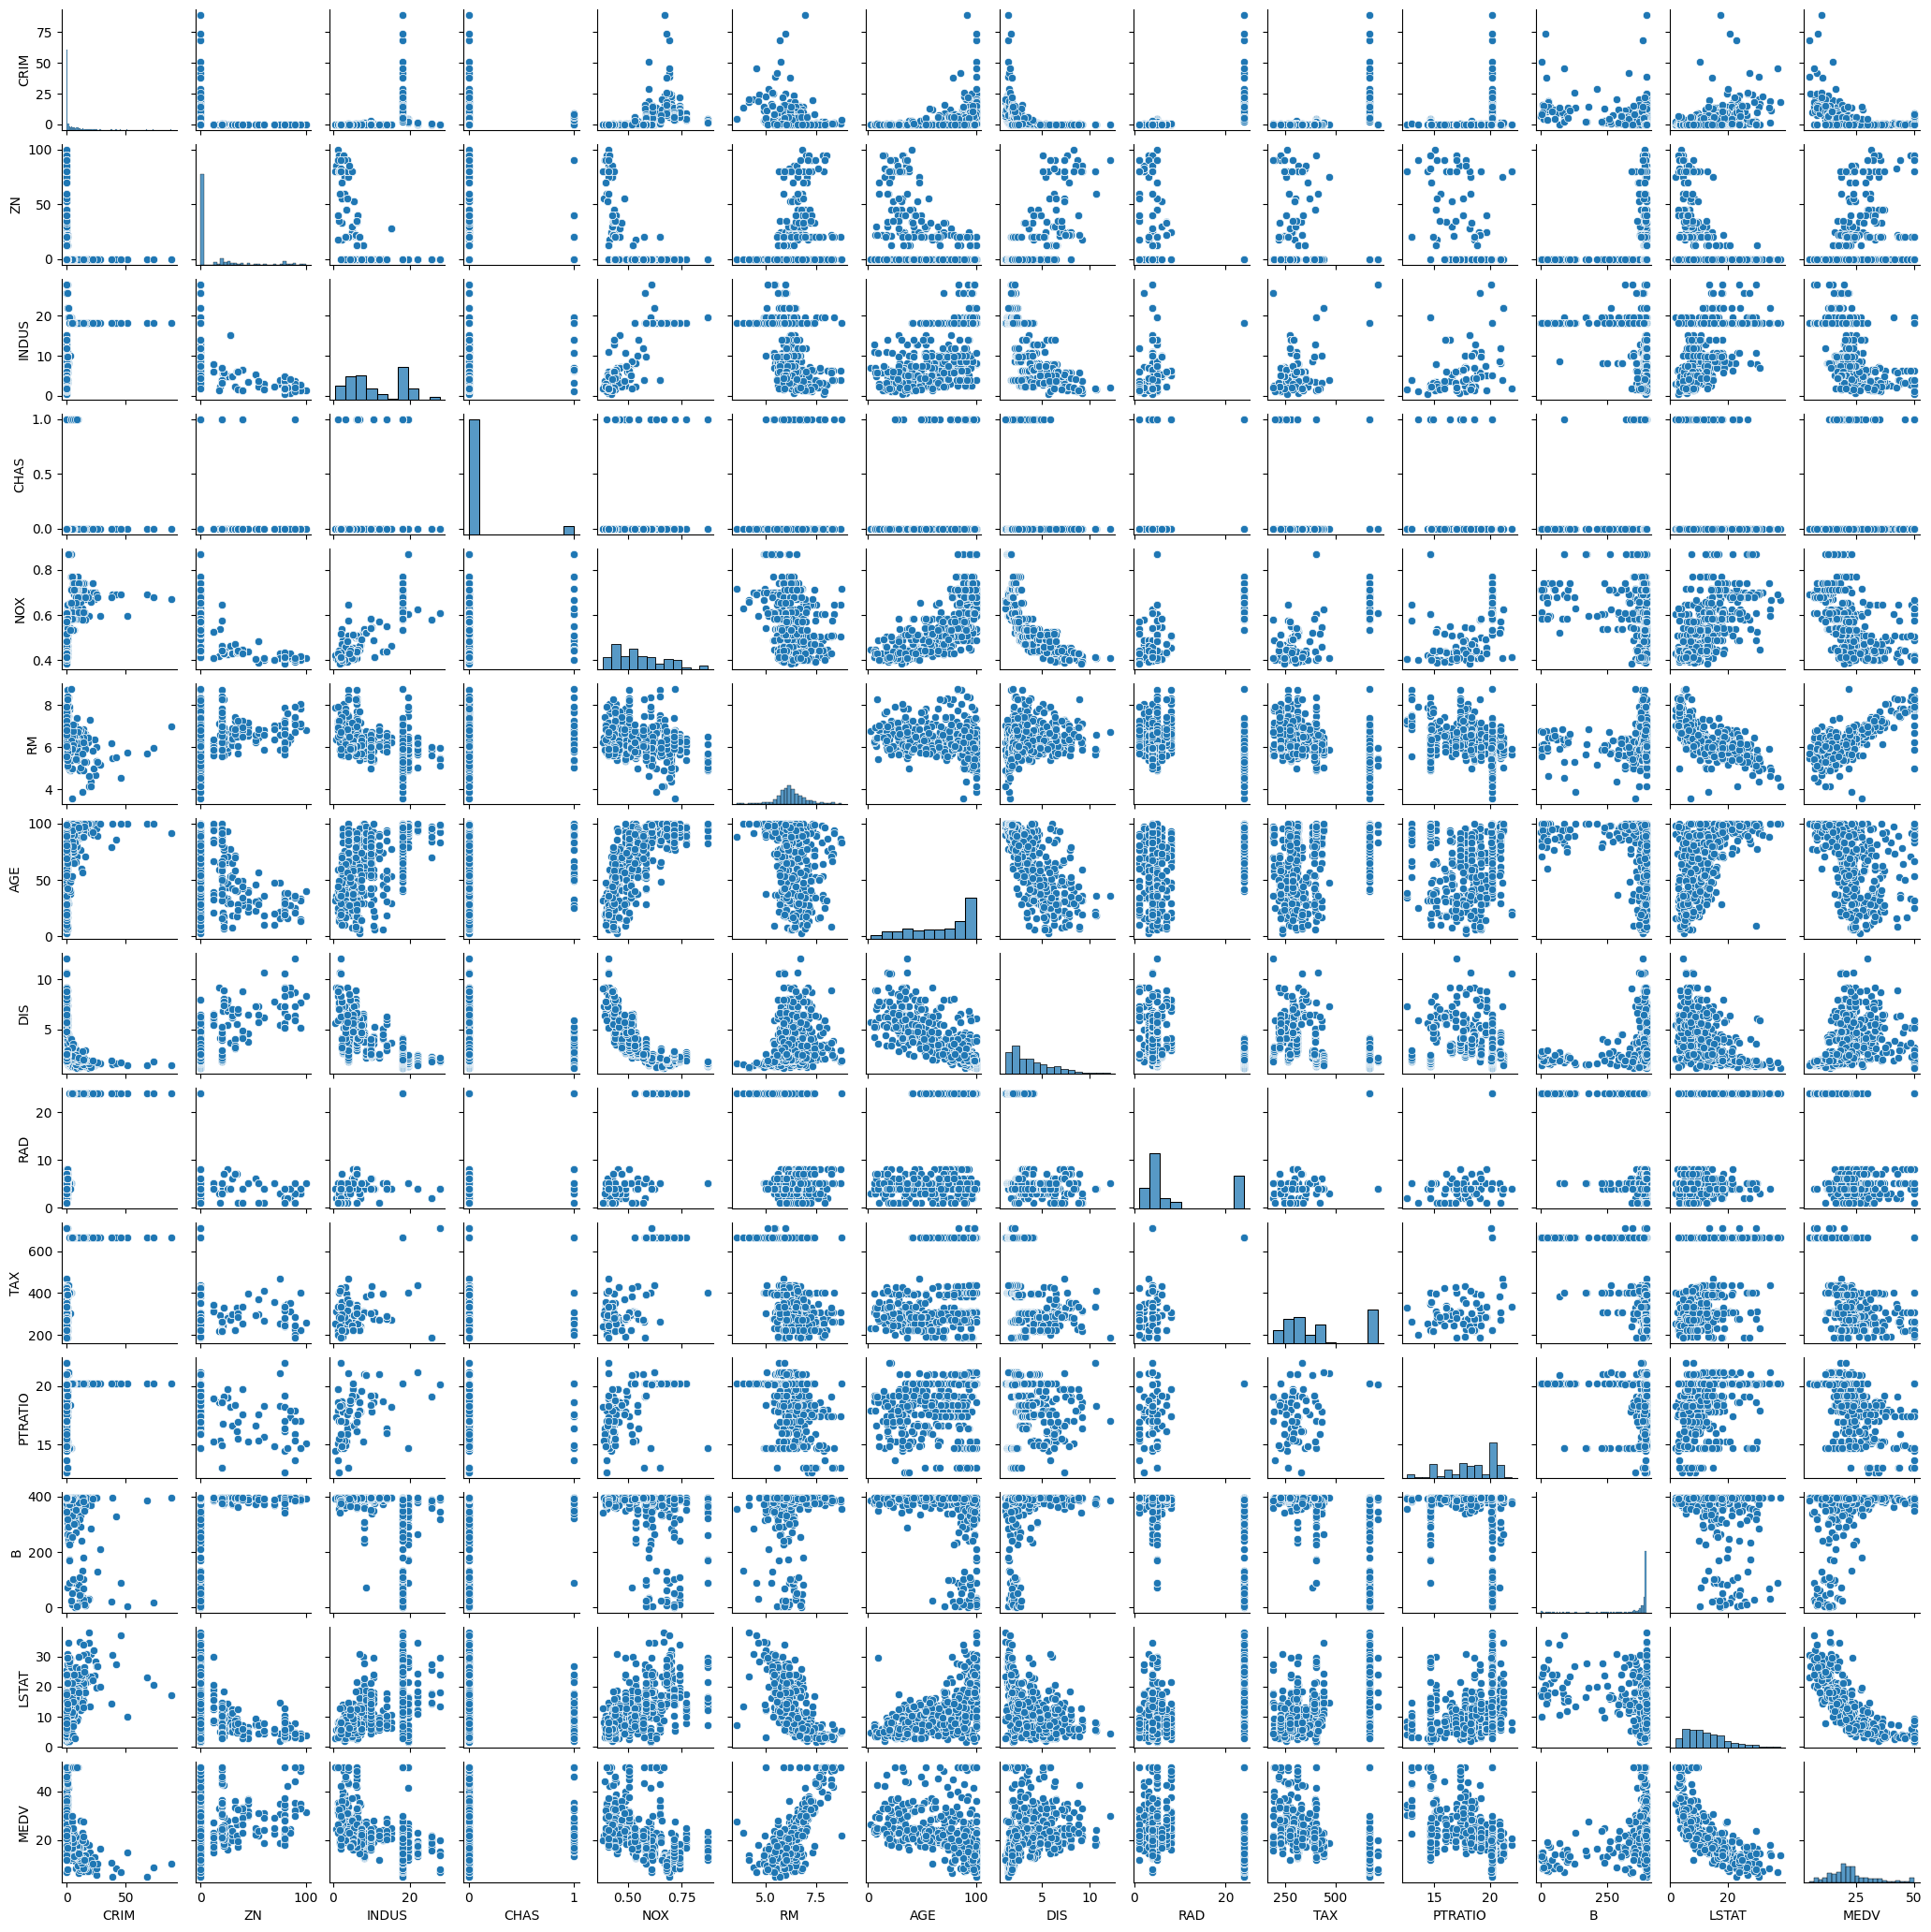

In [21]:
sns.pairplot(df, height=1.5);
plt.show()

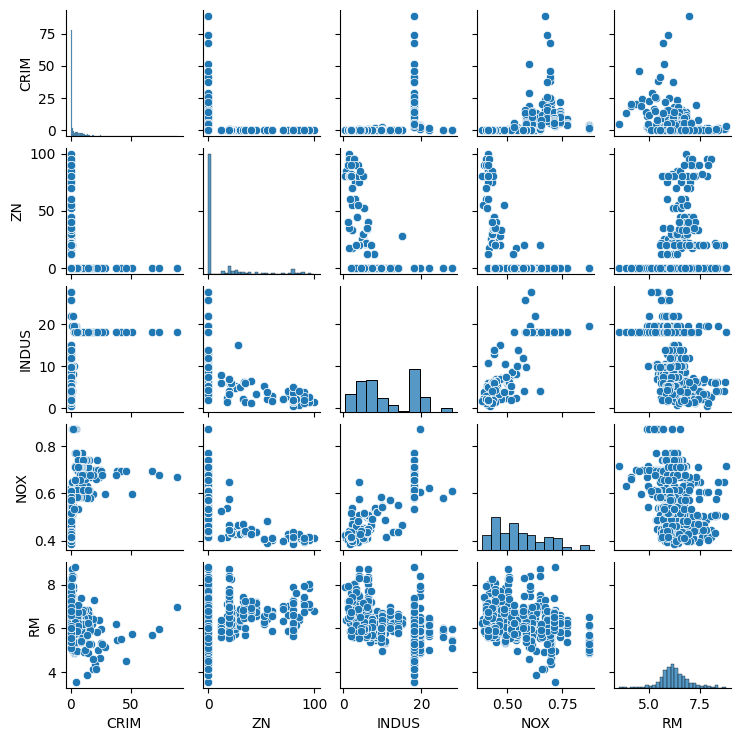

In [22]:
col_study = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM']
sns.pairplot(df[col_study], height=1.5);
plt.show()

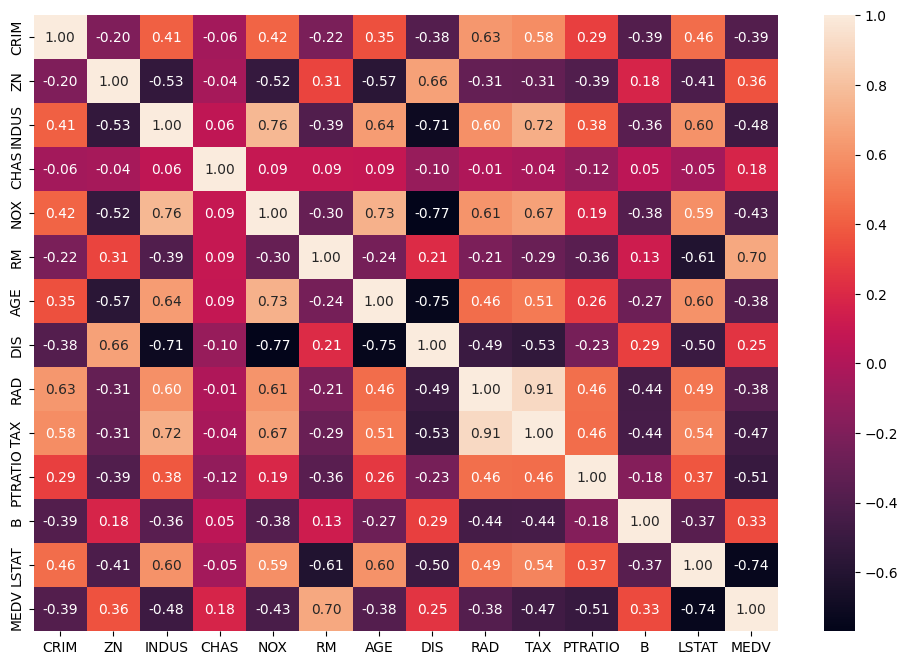

In [23]:
pd.options.display.float_format = '{:,.2f}'.format
df.corr()
 
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.show()

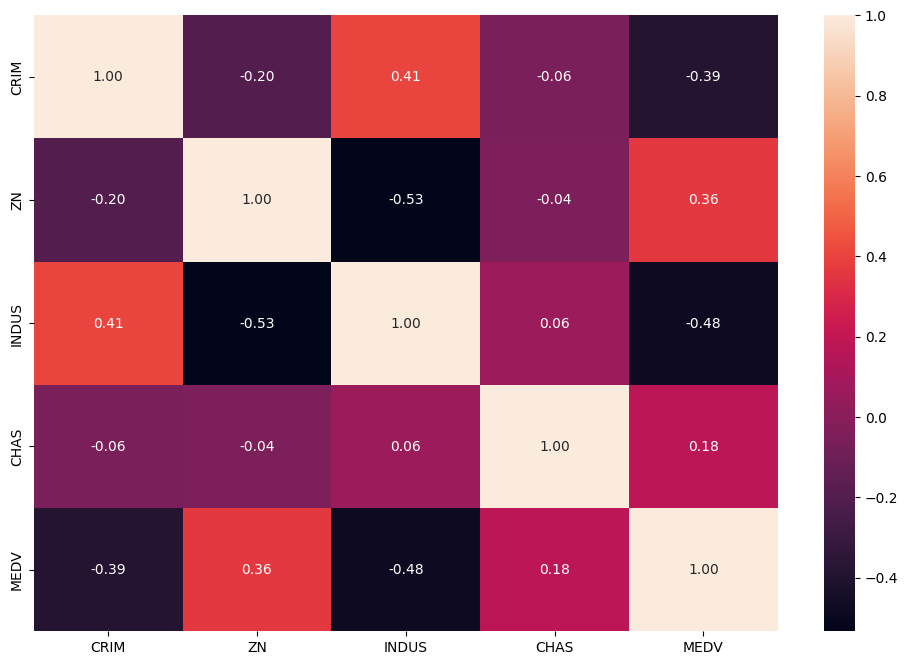

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.01,18.00,2.31,0,0.54,6.58,65.20,4.09,1,296.00,15.30,396.90,4.98,24.00
1,0.03,0.00,7.07,0,0.47,6.42,78.90,4.97,2,242.00,17.80,396.90,9.14,21.60
2,0.03,0.00,7.07,0,0.47,7.18,61.10,4.97,2,242.00,17.80,392.83,4.03,34.70
3,0.03,0.00,2.18,0,0.46,7.00,45.80,6.06,3,222.00,18.70,394.63,2.94,33.40
4,0.07,0.00,2.18,0,0.46,7.15,54.20,6.06,3,222.00,18.70,396.90,5.33,36.20


In [24]:
plt.figure(figsize=(12,8))
sns.heatmap(df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'MEDV']].corr(), annot=True, fmt=".2f")
plt.show()
 
import matplotlib as mpl
 
df.head()

<Axes: >

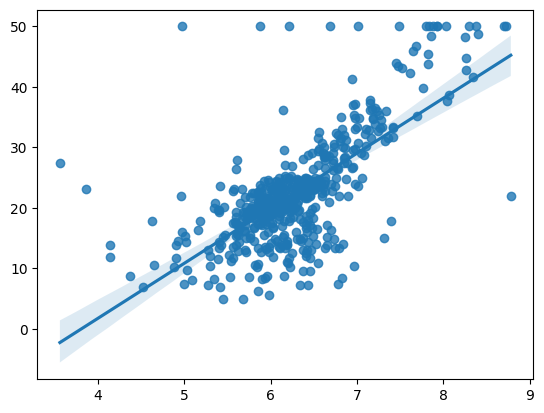

In [26]:
Xrm = df['RM'].values.reshape(-1,1)
ymedv = df['MEDV'].values.reshape(-1,1)
sns.regplot(x=Xrm,y=ymedv)

In [29]:
model = LinearRegression()
model.fit(Xrm,ymedv)

LinearRegression()

In [32]:
#model.coef_ #Coeficient
model.intercept_ #Coordenates

array([-34.67062078])

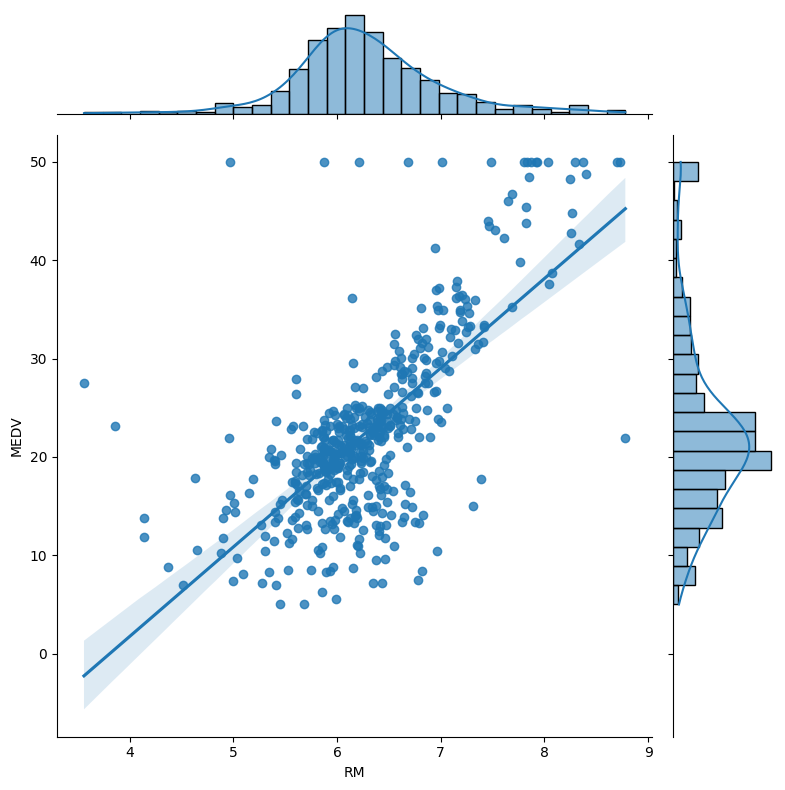

In [40]:
sns.jointplot(x='RM', y='MEDV', data=df, kind='reg', height=8);
plt.show();

In [42]:
model.predict(np.array([6]).reshape(1,-1))

array([[19.94203311]])

In [55]:
df.head()
X = df['RM'].values.reshape(-1,1)
y = df['MEDV'].values
 
from sklearn.linear_model import RANSACRegressor
ransac = RANSACRegressor()
ransac.fit(X, y)
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

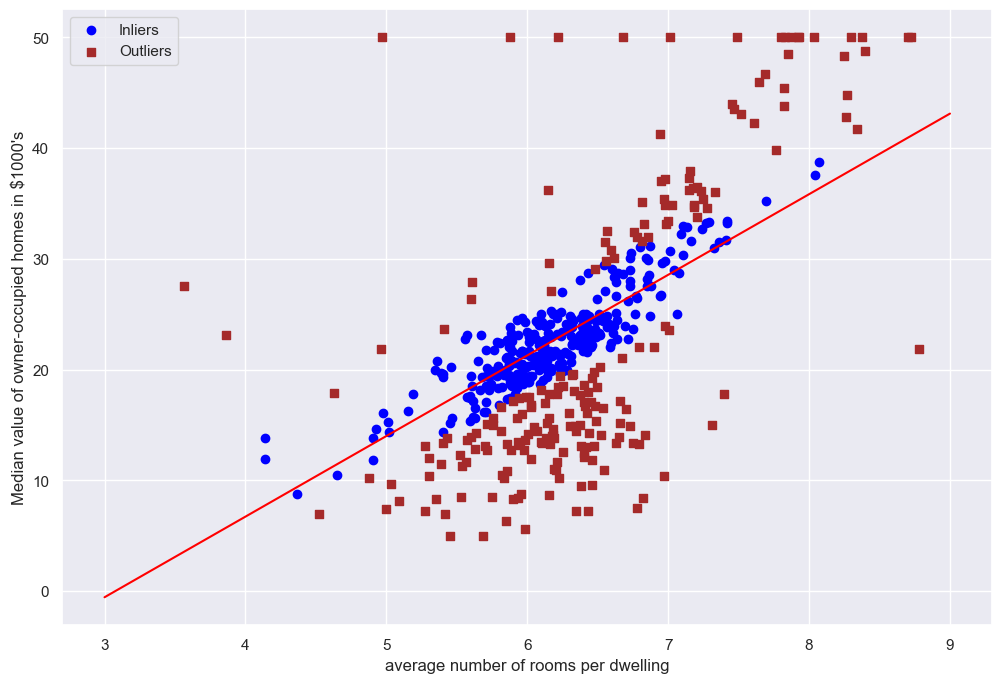

In [53]:
 
np.arange(3, 10, 1)
line_X = np.arange(3, 10, 1)
line_y_ransac = ransac.predict(line_X.reshape(-1, 1))
 

sns.set(style='darkgrid', context='notebook')
plt.figure(figsize=(12,8));
plt.scatter(X[inlier_mask], y[inlier_mask],
            c='blue', marker='o', label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask],
            c='brown', marker='s', label='Outliers')
plt.plot(line_X, line_y_ransac, color='red')
plt.xlabel('average number of rooms per dwelling')
plt.ylabel("Median value of owner-occupied homes in $1000's")
plt.legend(loc='upper left')
plt.show()


 

In [56]:
ransac.estimator_.coef_


array([11.96704354])

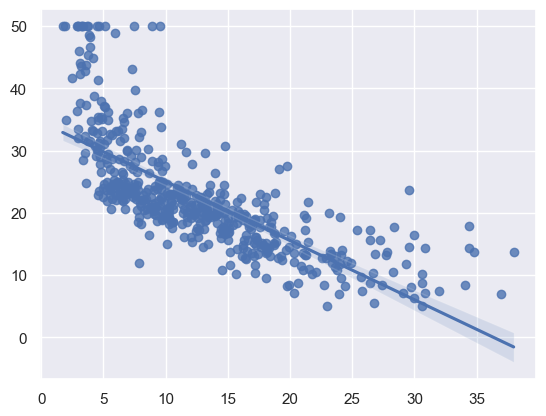

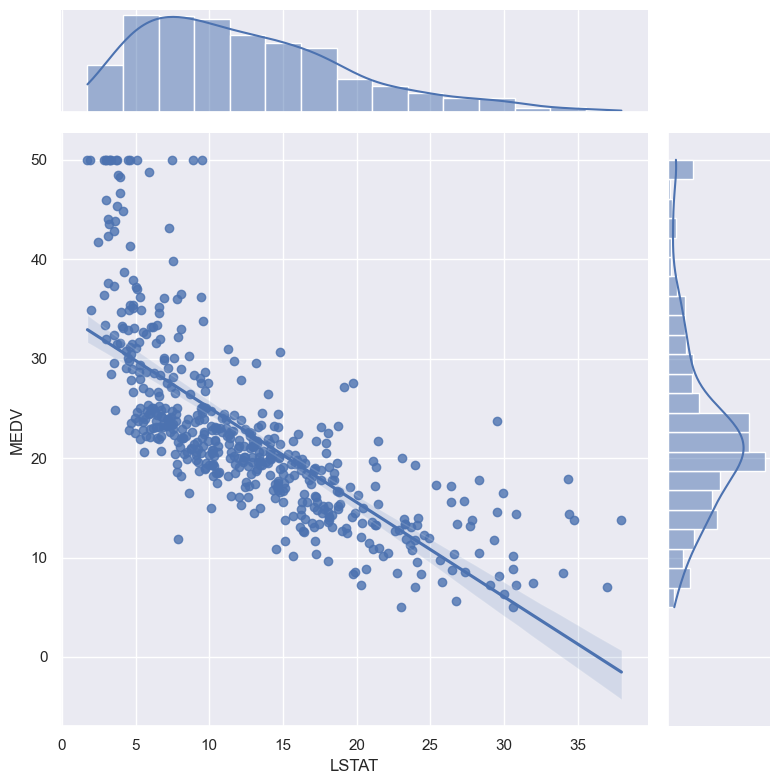

array([[20.30310057]])

In [57]:
#Example #2
Xstat = df['LSTAT'].values.reshape(-1,1)
ymedv = df['MEDV'].values.reshape(-1,1)
sns.regplot(x=Xstat,y=ymedv)
model = LinearRegression()
model.fit(Xstat,ymedv)
sns.jointplot(x='LSTAT', y='MEDV', data=df, kind='reg', height=8);
plt.show();
model.predict(np.array([15]).reshape(1,-1))

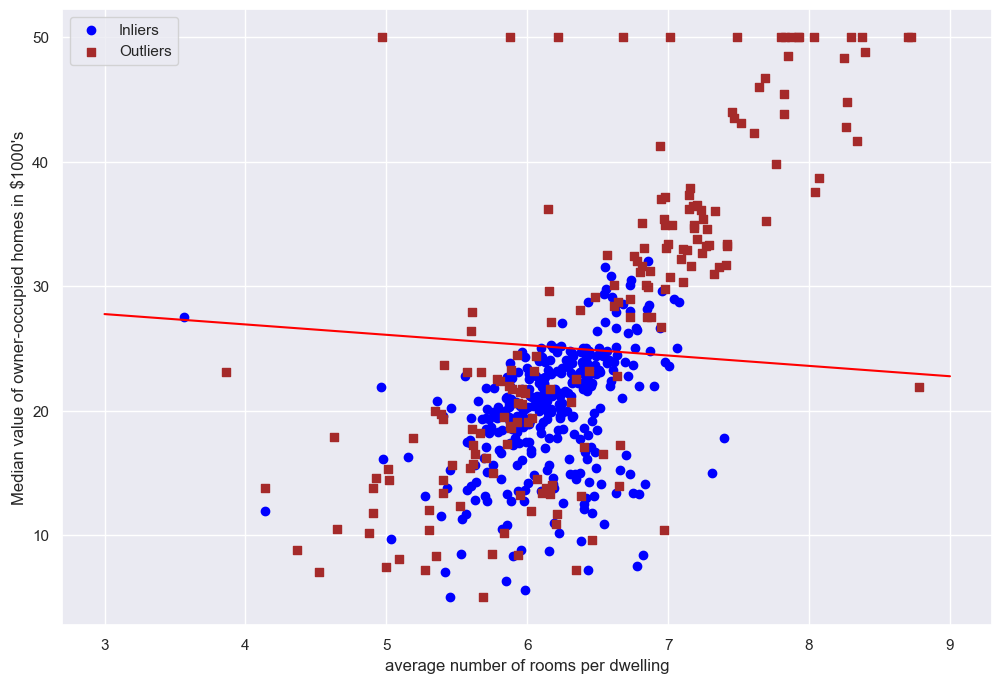

In [60]:
df.head()
Xstat = df['LSTAT'].values.reshape(-1,1)
ymedv = df['MEDV'].values
 

from sklearn.linear_model import RANSACRegressor
ransac = RANSACRegressor()
ransac.fit(Xstat, ymedv)
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

np.arange(3, 10, 1)
line_X = np.arange(3, 10, 1)
line_y_ransac = ransac.predict(line_X.reshape(-1, 1))
 

sns.set(style='darkgrid', context='notebook')
plt.figure(figsize=(12,8));
plt.scatter(X[inlier_mask], y[inlier_mask],
            c='blue', marker='o', label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask],
            c='brown', marker='s', label='Outliers')
plt.plot(line_X, line_y_ransac, color='red')
plt.xlabel('average number of rooms per dwelling')
plt.ylabel("Median value of owner-occupied homes in $1000's")
plt.legend(loc='upper left')
plt.show()


In [62]:
model.coef_ #Coeficient


array([[-0.95004935]])

In [ ]:
model.intercept_ #Coordenates